In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 17 19:37:10 2019

@author: RSilvestre
"""

# prepare for Python version 3x features and functions
from __future__ import division, print_function

# import packages for analysis
import os
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from pathlib import Path
import urllib.parse
import random
import statsmodels.api as sm # logistic regression
import statsmodels.formula.api as smf # R-like model specification
import patsy # translate model specification into design matrices

ModuleNotFoundError: No module named 'seaborn'

In [2]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [3]:
#Read in final cleaned and de-duped data
final_data = pd.read_csv('Merged_dataset_w_LatLong_rs_durationV4.csv') # bring in Olist data

In [4]:
# check data shape
print(final_data.shape)

(98666, 56)


In [5]:
# examine data structure
final_data.head()

,Unnamed: 0,Rww_ID,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,...,rev_score_sat,rev_score_sat_binary,fulfill_duration,ord_status_delivered,ord_status_approved,ord_status_canceled,ord_status_invoiced,ord_status_processing,ord_status_shipped,ord_status_unavailable
0,0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29,3ce436f183e68e07877b285a838db11a,...,yes,1,8,1,0,0,0,0,0,0
1,1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,...,yes,1,16,1,0,0,0,0,0,0
2,2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,...,yes,1,8,1,0,0,0,0,0,0
3,3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,...,yes,1,6,1,0,0,0,0,0,0
4,4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,...,yes,1,25,1,0,0,0,0,0,0


In [6]:
# examine summary statistics of numeric variables
print('\nSummary Statistics of Numeric Variables ---------------')
final_data.describe()


Summary Statistics of Numeric Variables ---------------


,Unnamed: 0,Rww_ID,order_item_id,price,freight_value,customer_zip_code_prefix,review_score,product_name_lenght,product_description_lenght,product_photos_qty,...,long_seller,rev_score_sat_binary,fulfill_duration,ord_status_delivered,ord_status_approved,ord_status_canceled,ord_status_invoiced,ord_status_processing,ord_status_shipped,ord_status_unavailable
count,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,...,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000
mean,57800.646454,59249.280907,1.000284,125.944833,20.202318,35156.971834,4.089798,48.847952,794.153579,2.218079,...,-47.219797,0.771330,12.506233,0.977824,0.000020,0.004672,0.003162,0.003051,0.011210,0.000061
std,34925.589625,34164.199743,0.019099,191.291679,15.909884,29798.762988,1.343624,9.929105,649.972101,1.754821,...,2.347316,0.419979,9.444246,0.147256,0.004502,0.068195,0.056145,0.055149,0.105281,0.007798
min,0.000000,0.000000,1.000000,0.850000,0.000000,1003.000000,1.000000,0.000000,4.000000,0.000000,...,-67.813284,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27375.250000,29696.250000,1.000000,41.650000,13.310000,11360.000000,4.000000,43.000000,352.000000,1.000000,...,-48.720670,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,57817.500000,59330.500000,1.000000,79.000000,16.360000,24425.000000,5.000000,52.000000,616.000000,1.000000,...,-46.743600,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,88097.750000,88811.750000,1.000000,139.900000,21.230000,58991.250000,5.000000,57.000000,989.000000,3.000000,...,-46.518679,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,118317.000000,118317.000000,4.000000,6735.000000,409.680000,99990.000000,5.000000,76.000000,3992.000000,20.000000,...,-34.855658,1.000000,210.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#check data types
final_data.dtypes

Unnamed: 0                         int64
Rww_ID                             int64
order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_

In [8]:
# frequency of satisfaction
print('\nAre Satisfied ---------------')


Are Satisfied ---------------


In [9]:
final_data['rev_score_sat'].value_counts()

yes    76104
no     22562
Name: rev_score_sat, dtype: int64

In [10]:
# define rev score. Frequency of those satisfied
rev_score_sat = final_data['rev_score_sat']

print('\n---------- Percentage of satisfied buyers ---------------')
(rev_score_sat == 'yes').sum() / len(rev_score_sat) * 100


---------- Percentage of satisfied buyers ---------------


77.13295360103784

In [12]:
# create a list w/numeric variables
list1 = ['review_score','payment_value','price','fulfill_duration','freight_value','product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm','product_description_lenght','product_name_lenght','product_photos_qty']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AAB2F98>,
      dtype=object)

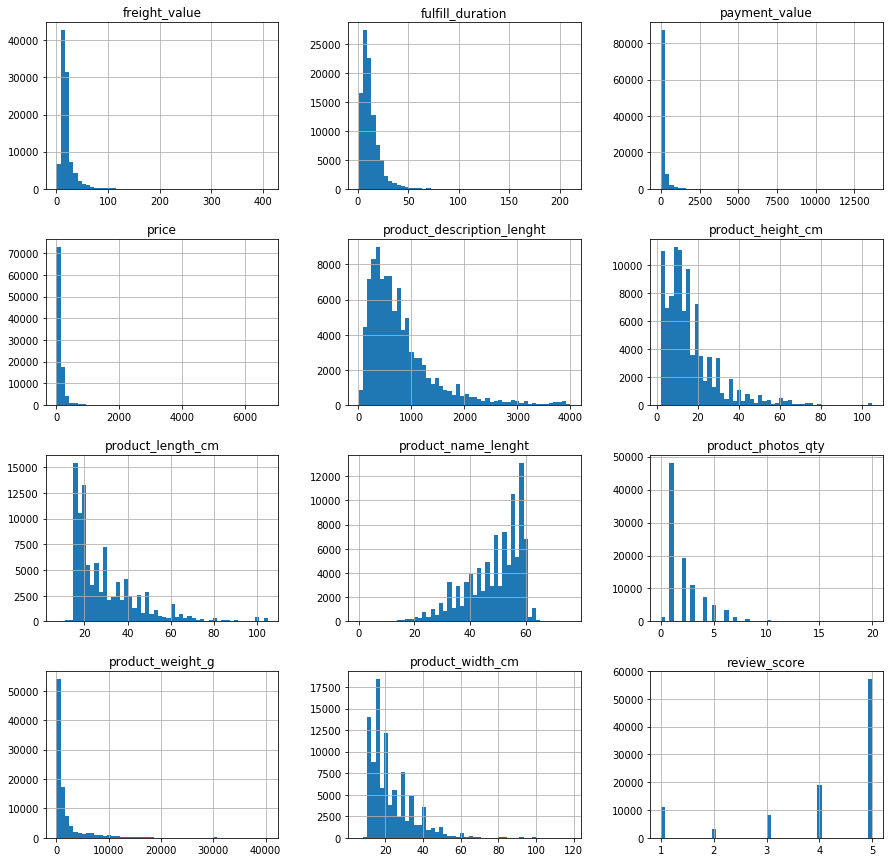

In [13]:
#check distribution of numeric variables
final_data[list1].hist(bins=50, figsize=(15,15))

In [14]:
# define model variables
rev_score_sat_binary = final_data['rev_score_sat_binary']
fulfill_duration = final_data['fulfill_duration']
ord_status_delivered = final_data['ord_status_delivered']
ord_status_shipped = final_data['ord_status_shipped']
ord_status_canceled = final_data['ord_status_canceled']

In [15]:
################Logistic Regression model 1 w/4 explanatory variables. Dependent variable is Binary Satisfaction rating of 1=yes and 0=mo ########################
# gather four explanatory variables and response into a numpy array
# here we use .T to obtain the transpose for the structure we want
model_data2 = np.array([np.array(fulfill_duration), np.array(ord_status_delivered), np.array(ord_status_shipped), np.array(ord_status_canceled), np.array(rev_score_sat_binary)]).T

# check model data shape
model_data2.shape

# cross-validation scoring code adapted from Scikit Learn documentation
from sklearn.metrics import roc_auc_score

# specify the set of classifiers being evaluated
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

classifier_names = ["Naive_Bayes", "Logistic_Regression"]

classifiers = [BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False), 
               LogisticRegression(solver = 'lbfgs')]

# dimensions of the additive model X input and y response
print('\nData dimensions:', model_data2.shape)

# --------------------------------------------------------
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(classifier_names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized

for train_index, test_index in kf.split(model_data2):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data2[train_index, 0:model_data2.shape[1]-1]
    X_test = model_data2[test_index, 0:model_data2.shape[1]-1]
    y_train = model_data2[train_index, model_data2.shape[1]-1]
    y_test = model_data2[test_index, model_data2.shape[1]-1]   

    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, clf in zip(classifier_names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = classifier_names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 Area under ROC Curve', sep = '')     
print(cv_results_df.mean())


Data dimensions: (98666, 5)

Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (88799, 4)
X_test: (9867, 4)
y_train: (88799,)
y_test: (9867,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5383805551874238

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Area under ROC curve: 0.6852261214903553

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (88799, 

Area under ROC curve: 0.6907553600389948

----------------------------------------------
Average results from 10-fold cross-validation

Method                 Area under ROC Curve
Naive_Bayes            0.539434
Logistic_Regression    0.682712
dtype: float64
